In [5]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

# Actividad 03: Errores

### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales
---

# 1
La serie de Taylor para la función seno ($\sin(x)$) centrada en $a=0$ (también conocida como la serie de Maclaurin) se expresa de la siguiente manera:

> Añadir blockquote



$$\sin(x) = \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n+1)!} x^{2n+1} = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \cdots$$

* Encontrar la aproximación para $x = \pi/4$ cambiando el valor de tolerancia, ¿Qué puede concluir de la serie?
* Hallar el error relativo y porcentual.
* Grafique los valores asociados a la serie después de cada iteración.
* Repita para la serie:
$$\ln(1+x) = \sum_{n=1}^{\infty} \frac{(-1)^{n-1}}{n} x^n$$

Aproximación de sin(π/4) = 0.7071067829368671 en 4 iteraciones
Error relativo: 2.4753258115344967e-09
Error porcentual: 2.475325811534497e-07%


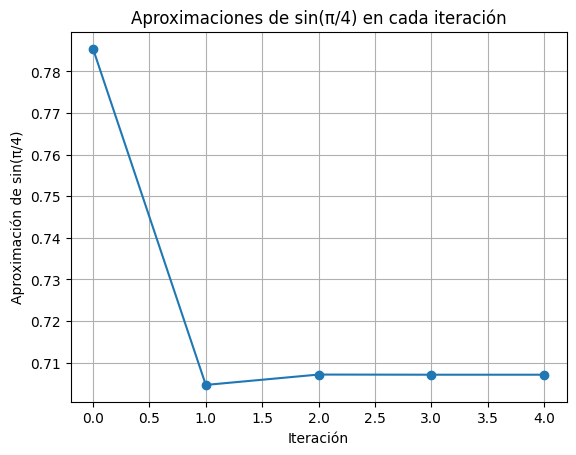

Aproximación de ln(1+0.5) = 0.3934693351624503 en 8 iteraciones
Error relativo: 0.029585216349896158
Error porcentual: 2.9585216349896157%


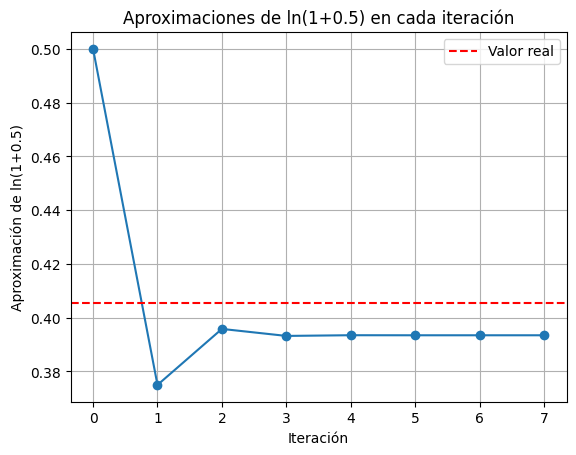

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math

# primera parte
def sin_taylor(x, tolerance):
    n = 0
    term = x  # Primer término de la serie
    sin_approx = term
    while abs(term) > tolerance:
        n += 1
        term *= -x**2 / ((2*n) * (2*n + 1))  # Calcula el siguiente término
        sin_approx += term
    return sin_approx, n
# Parámetros
x = math.pi / 4
tolerance = 1e-6  # Cambia este valor para ver diferentes tolerancias
sin_approx, iterations = sin_taylor(x, tolerance)
print(f"Aproximación de sin(π/4) = {sin_approx} en {iterations} iteraciones")

# segunda parte
# Cálculo del error
actual_value = math.sin(x)
relative_error = abs((actual_value - sin_approx) / actual_value)
percentage_error = relative_error * 100
print(f"Error relativo: {relative_error}")
print(f"Error porcentual: {percentage_error}%")

#tercera parte (grafica)

def sin_taylor_with_plot(x, tolerance):
    n = 0
    term = x  # Primer término de la serie
    sin_approx = term
    approximations = [sin_approx]

    while abs(term) > tolerance:
        n += 1
        term *= -x**2 / ((2*n) * (2*n + 1))  # Calcula el siguiente término
        sin_approx += term
        approximations.append(sin_approx)

    return approximations
approximations = sin_taylor_with_plot(x, tolerance)
plt.plot(approximations, marker='o')
plt.title('Aproximaciones de sin(π/4) en cada iteración')
plt.xlabel('Iteración')
plt.ylabel('Aproximación de sin(π/4)')
plt.grid()
plt.show()

# el mismo procedimiento pero para ln(1+x)

def ln_taylor(x, tolerance):
    n = 1
    term = x  # Primer término de la serie
    ln_approx = term
    while abs(term) > tolerance:
        n += 1
        term *= -x / n  # Calcula el siguiente término
        ln_approx += term
    return ln_approx, n
# Parámetros
x_ln = 0.5  # Cambia este valor para diferentes x
tolerance_ln = 1e-6
ln_approx, iterations_ln = ln_taylor(x_ln, tolerance_ln)
print(f"Aproximación de ln(1+{x_ln}) = {ln_approx} en {iterations_ln} iteraciones")
# Cálculo del error
actual_value_ln = math.log(1 + x_ln)
relative_error_ln = abs((actual_value_ln - ln_approx) / actual_value_ln)
percentage_error_ln = relative_error_ln * 100
print(f"Error relativo: {relative_error_ln}")
print(f"Error porcentual: {percentage_error_ln}%")

def ln_taylor_with_plot(x, tolerance):
    n = 1
    term = x  # Primer término de la serie
    ln_approx = term
    approximations = [ln_approx]

    while abs(term) > tolerance:
        n += 1
        term *= -x / n  # Calcula el siguiente término
        ln_approx += term
        approximations.append(ln_approx)

    return approximations
# Parámetros
x_ln = 0.5  # Cambia este valor para diferentes x
tolerance_ln = 1e-6
approximations_ln = ln_taylor_with_plot(x_ln, tolerance_ln)
plt.plot(approximations_ln, marker='o')
plt.title(f'Aproximaciones de ln(1+{x_ln}) en cada iteración')
plt.xlabel('Iteración')
plt.ylabel(f'Aproximación de ln(1+{x_ln})')
plt.grid()
plt.axhline(y=math.log(1 + x_ln), color='r', linestyle='--', label='Valor real')
plt.legend()
plt.show()

# 2

La serie de Taylor para la función $(1+x)^\alpha$, conocida como la **serie binomial**, centrada en $a=0$ está dada por:

$$(1+x)^\alpha = \sum_{n=0}^{\infty} \binom{\alpha}{n} x^n = 1 + \alpha x + \frac{\alpha(\alpha-1)}{2!} x^2 + \frac{\alpha(\alpha-1)(\alpha-2)}{3!} x^3 + \cdots$$

donde $\binom{\alpha}{n}$ es el coeficiente binomial generalizado.

Considere el caso donde $\alpha = 1/2$, lo que nos da la serie de Taylor para $\sqrt{1+x}$:

$$\sqrt{1+x} = \sum_{n=0}^{\infty} \binom{1/2}{n} x^n = 1 + \frac{1}{2} x - \frac{1}{8} x^2 + \frac{1}{16} x^3 - \frac{5}{128} x^4 + \cdots$$

a.  **Encontrar la aproximación para $x = 0.5$** cambiando el número de términos incluidos en la suma. ¿Qué puedes concluir sobre la convergencia de la serie para este valor de $x$?

b.  **Hallar el error relativo y porcentual** para cada aproximación, utilizando el valor real de $\sqrt{1+0.5} = \sqrt{1.5} \approx 1.224744871$.


c.  **Grafique los valores asociados a la serie después de cada iteración.** Muestra cómo la serie se acerca al valor real a medida que se incluyen más términos.

d. **Utilizando el criterio de tolerancia, evalue 6 a 7 valores diferentes**, y encuentre cuántos términos son necesarios para alcanzar dicha resolución. Realice un gráfico de la evolución del sistema.



Aproximación de √(1+0.5) con 1 términos: 1.0
Aproximación de √(1+0.5) con 2 términos: 1.25
Aproximación de √(1+0.5) con 3 términos: 1.21875
Aproximación de √(1+0.5) con 4 términos: 1.2265625
Aproximación de √(1+0.5) con 5 términos: 1.22412109375
Aproximación de √(1+0.5) con 6 términos: 1.2249755859375
Aproximación de √(1+0.5) con 7 términos: 1.2246551513671875
Aproximación de √(1+0.5) con 8 términos: 1.2247810363769531
Aproximación de √(1+0.5) con 9 términos: 1.2247298955917358
Aproximación de √(1+0.5) con 10 términos: 1.224751204252243
Error relativo con 1 términos: 0.18350341907227388
Error porcentual con 1 términos: 18.35034190722739%
Error relativo con 2 términos: 0.02062072615965763
Error porcentual con 2 términos: 2.062072615965763%
Error relativo con 3 términos: 0.00489479199433381
Error porcentual con 3 términos: 0.489479199433381%
Error relativo con 4 términos: 0.0014840875441640507
Error porcentual con 4 términos: 0.14840875441640505%
Error relativo con 5 términos: 0.00050931

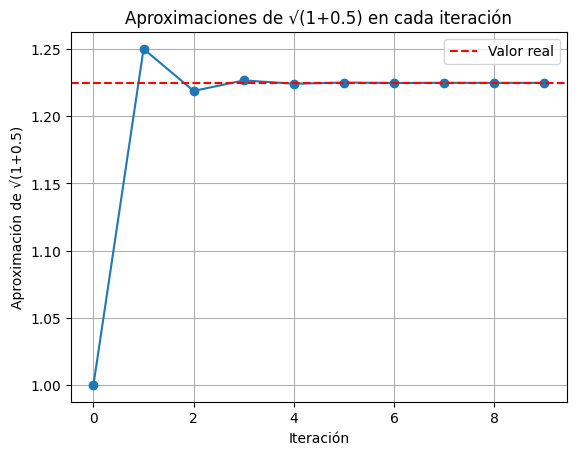

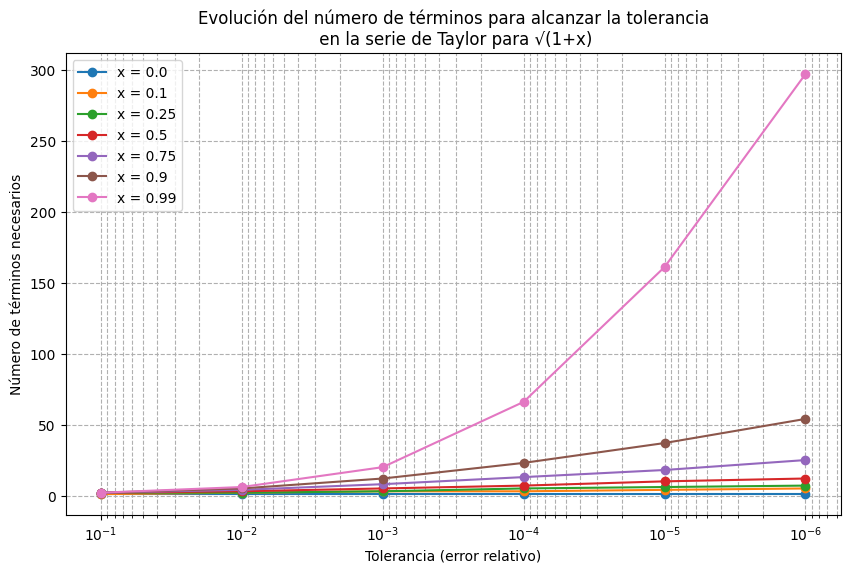

In [11]:
import math
import matplotlib.pyplot as plt
import numpy as np
#a
def sqrt_taylor(x, terms):
    alpha = 1/2
    sqrt_approx = 0
    for n in range(terms):
        # Coeficiente binomial generalizado
        coeff = 1
        for k in range(n):
            coeff *= (alpha - k) / (k + 1)
        sqrt_approx += coeff * (x ** n)
    return sqrt_approx
# Parámetros
x = 0.5
terms_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Cambia el número de términos
for terms in terms_list:
    sqrt_approx = sqrt_taylor(x, terms)
    print(f"Aproximación de √(1+{x}) con {terms} términos: {sqrt_approx}")

#b
# Cálculo del error
actual_value = math.sqrt(1 + x)
for terms in terms_list:
    sqrt_approx = sqrt_taylor(x, terms)
    relative_error = abs((actual_value - sqrt_approx) / actual_value)
    percentage_error = relative_error * 100
    print(f"Error relativo con {terms} términos: {relative_error}")
    print(f"Error porcentual con {terms} términos: {percentage_error}%")

#c
def sqrt_taylor_with_plot(x, max_terms):
    alpha = 1/2
    approximations = []
    sqrt_approx = 0

    for n in range(max_terms):
        coeff = 1
        for k in range(n):
            coeff *= (alpha - k) / (k + 1)
        sqrt_approx += coeff * (x ** n)
        approximations.append(sqrt_approx)

    return approximations
max_terms = 10
approximations = sqrt_taylor_with_plot(x, max_terms)
plt.plot(approximations, marker='o')
plt.title(f'Aproximaciones de √(1+{x}) en cada iteración')
plt.xlabel('Iteración')
plt.ylabel(f'Aproximación de √(1+{x})')
plt.axhline(y=actual_value, color='r', linestyle='--', label='Valor real')
plt.legend()
plt.grid()
plt.show()

#d
def terms_needed_for_tolerance(x, tolerance):
    alpha = 1/2
    sqrt_approx = 0
    n = 0
    actual_value = math.sqrt(1 + x)

    while True:
        coeff = 1
        for k in range(n):
            coeff *= (alpha - k) / (k + 1)
        sqrt_approx += coeff * (x ** n)

        relative_error = abs((actual_value - sqrt_approx) / actual_value)
        if relative_error < tolerance or n > 1000:  # límite para evitar bucle infinito
            break
        n += 1

    return n + 1  # Números de términos usados (0 a n)

# Valores de x a evaluar (7 valores)
x_values = [0.0, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]
# Valores de tolerancia (6 valores, log-spaced)
tolerances = np.logspace(-1, -6, 6)
# Para almacenar resultados: matriz términos necesarios [len(x_values) x len(tolerances)]
terms_matrix = []
for x in x_values:
    terms_for_x = []
    for tol in tolerances:
        terms = terms_needed_for_tolerance(x, tol)
        terms_for_x.append(terms)
    terms_matrix.append(terms_for_x)

# Grafica
plt.figure(figsize=(10,6))
for i, x in enumerate(x_values):
    plt.plot(tolerances, terms_matrix[i], marker='o', label=f'x = {x}')
plt.xscale('log')
plt.xlabel('Tolerancia (error relativo)')
plt.ylabel('Número de términos necesarios')
plt.title('Evolución del número de términos para alcanzar la tolerancia\n en la serie de Taylor para √(1+x)')
plt.gca().invert_xaxis()  # para mostrar tolerancia menor a la derecha
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()